In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP

In [33]:
#Experimental datas
PHP = 14.2e5 #Pa
PBP = 3.41e5 #Pa
T2 = 77.45+273.15 #K
T3 = 32.36+273.15 #K
Tsurch = 10.492 #°C
T1 = CP.PropsSI('T','Q',1,'P',PBP,'R134a')+Tsurch;print(f'T1 = {T1-273.15}°C') #2.58°C 
m = 275.4518*1e-3 #kg/s

#Calculation
Htp2 = CP.PropsSI('H','T',T2,'P',PHP,'R134a');print(f'H2 = {Htp2*1e-3}kJ/kg')
Htp3 = CP.PropsSI('H','T',T3,'P',PHP,'R134a');print(f'H3 = {Htp3*1e-3}kJ/kg')
T4 = CP.PropsSI('T','H',Htp3,'P',PBP,'R134a');print(f'T4 = {T4-273.15}°C')
Htp1 = CP.PropsSI('H','T',T1,'P',PBP,'R134a');print(f'H1 = {Htp1*1e-3}kJ/kg')
x4 = CP.PropsSI('Q','P',PBP,'H',Htp3,'R134a'); print(f'y4 = {x4*100}%')

print("")
Qev = m*(11-3.6)*4.18; print(f'Q_ev = {Qev} kW')
mref = Qev/(Htp1-Htp3)/1e-3; print(f'mref = {mref*1e3} g/s')  #Htp3=Htp4
Qcond = mref*(Htp3-Htp2)*1e-3; print(f'Qcond = {Qcond} kW')

S1 = CP.PropsSI('S','H',Htp1,'P',PBP,'R134a') #entropy
Htp2is = CP.PropsSI('H','S',S1,'T',77.45+273.45,'R134a')
Wreal = mref*(Htp2-Htp1)*1e-3; print(f'Wreal = {Wreal} kW and efficency {Wreal/2.95*100}%')
Wisen = mref*(Htp2is-Htp1)*1e-3;print(f'W_isentropique = {Wisen} kW and efficiency_is = {Wisen/Wreal*100}%')
COP = Qev/Wreal; print(f'COP = {COP}')

T1 = 14.77289607422523°C
H2 = 453.31657280767075kJ/kg
H3 = 245.11497668076038kJ/kg
T4 = 4.280896074225211°C
H1 = 410.61846900757223kJ/kg
y4 = 20.142107174719577%

Q_ev = 8.5202750776 kW
mref = 51.480938304162294 g/s
Qcond = -10.71841352503759 kW
Wreal = 2.1981384474375902 kW and efficency 74.51316770974881%
W_isentropique = 1.8781539609974196 kW and efficiency_is = 85.44293300482586%
COP = 3.876132136959907


C:\Users\Jolan\miniconda3\envs\py39\lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
C:\Users\Jolan\miniconda3\envs\py39\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


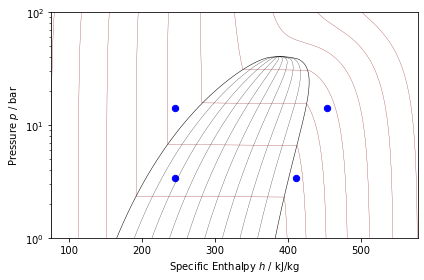

C:\Users\Jolan\miniconda3\envs\py39\lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


In [22]:
plot = CPP.PropertyPlot('HEOS::R134a', 'PH', unit_system='EUR', tp_limits='ACHP');
plt.ylim((1,100));
plot.calc_isolines(CP.iQ, num=10);
plot.calc_isolines(CP.iT, num=10);
PTP = np.array([3.41,14.2,14.2,3.41]) #bar
HTP = np.array([Htp1,Htp2,Htp3,Htp3])*1e-3 # kJ/kg
plt.scatter(HTP,PTP,s=40,c='blue');
plot.show();
#plot.savefig("TP.png",dpi=200)